In [ ]:
from google.colab import drive
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from scipy import spatial
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scipy import sparse
from sklearn.naive_bayes import MultinomialNB
from keras.callbacks import TensorBoard
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras.optimizers
import os
import keras

In [ ]:
drive.mount('/content/gdrive')
!ls "gdrive/My Drive/BookTrain"
!ls "gdrive/My Drive/BookTest"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
English10.txt  English4.txt  English8.txt  Finnish3.txt  Greek4.txt
English1.txt   English5.txt  English9.txt  Greek1.txt	 Polish1.txt
English2.txt   English6.txt  Finnish1.txt  Greek2.txt	 Polish2.txt
English3.txt   english7.txt  Finnish2.txt  Greek3.txt	 Polish3.txt
English1.txt  English2.txt  English3.txt


In [ ]:
stopwords = list(STOPWORDS)
stopwords.extend(["gutenberg", "project"])

In [ ]:
bookWord = []
bookChar = []
bookDict = {
    "Greek": None,
    "English": None,
    "Finnish": None,
    "Polish": None
}
bookName = []
min_length = float('inf')
for filename in os.listdir("gdrive/My Drive/BookTrain"):
    if filename.endswith("txt"):
        if "Polish" in filename: 
          book = [line.replace("\n", "") for line in open("gdrive/My Drive/BookTrain/"+ filename, encoding='iso-8859-1')]
          word = list(open("gdrive/My Drive/BookTrain/"+ filename, encoding='iso-8859-1').read())
          bookName.append("Polish")
        elif "Finnish" in filename:
          book = [line.replace("\n", "") for line in open("gdrive/My Drive/BookTrain/"+ filename, encoding='iso-8859-1')]
          word = list(open("gdrive/My Drive/BookTrain/"+ filename, encoding='iso-8859-1').read())
          bookName.append("Finnish")
        elif "Greek" in filename:
          book = [line.replace("\n", "") for line in open("gdrive/My Drive/BookTrain/"+ filename, encoding='ISO-8859-5')]
          word = list(open("gdrive/My Drive/BookTrain/"+ filename, encoding='iso-8859-5').read())
          bookName.append("Greek")
        else:
          book = [line.replace("\n", "") for line in open("gdrive/My Drive/BookTrain/"+filename)]
          word = list(open("gdrive/My Drive/BookTrain/"+ filename).read())
          bookName.append("English")
        if len(book) < min_length:
          min_length = len(book)
        word = [ele for ele in word if ele.strip()]
        bookWord.append(book)
        bookChar.append(word)

In [ ]:
processed_bookWord = []
for books in bookWord:
  processed_bookWord.append(books[:min_length])

In [ ]:
from collections import Counter
def get_top_n_words(corpus, n = None):
  vec = CountVectorizer(stop_words=stopwords).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

def get_top_n_chars(corpus, n = None):
  counter = Counter(corpus)
  most_occur = counter.most_common(n)
  return most_occur

def word_cloud(corpus):
  wordcloud = WordCloud().generate(corpus)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

def text_transform(corpus):
  vectorizer = TfidfVectorizer(max_features  = 1000)
  transformedText = vectorizer.fit_transform(corpus)
  return transformedText

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


юпя 434
юбя 337
юп 212
юз 204
юб 189
юн 166
юкюбюй 129
юея 120
юзя 118
юнюб 99
юй 72
юе 65
юбюн 62
юкюй 57
юйя 55
юќя 54
юпюн 51
юмюе 50
юмюпя 50
юзюн 48
юќ 46
юбюй 43
юня 42
юкя 39
юйюб 39


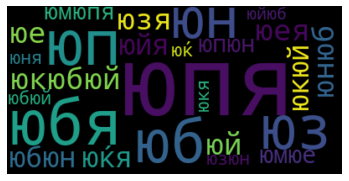

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


юпя 641
юбя 395
юб 368
юп 347
юея 234
юе 231
юкюбюй 214
юз 203
юнюб 169
юкюй 153
юй 143
юбюн 123
юќя 119
юн 104
юпюн 99
юмюе 96
юмюпя 82
юзюн 78
юзя 76
юмя 69
юкя 68
юйя 67
юйюб 66
юџя 65
юеюй 64


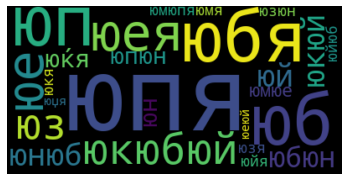

см 161
смё 67
greek 59
юпя 55
testament 47
new 43
сн 40
words 31
word 25
language 24
whence 24
hebrew 23
юзя 23
lexicon 22
юбя 21
спж 19
югя 19
english 15
снея 15
снйя 15
god 14
снй 14
co 14
юб 12
смая 12


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


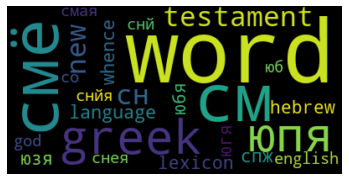

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


юпя 910
юбя 611
юн 535
юея 464
юкюбюй 327
юйя 276
юзя 247
юп 237
юб 201
юеюйя 180
юпюн 153
юзюн 151
юз 115
юўя 102
юдюе 94
юбюй 93
юќя 89
юџ 86
юе 84
юйюкя 80
юй 79
юкюбя 78
юќ 74
юня 70
юџя 67


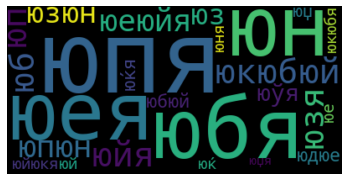

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


siä 131
nie 110
na 87
gå 82
spã³å 72
od 70
_å 50
oski 45
å¼e 45
wiä 41
jä 38
czy 38
wyrazã³w 37
ale 37
nastä 37
osek 37
ci 36
lub 36
zgå 36
np 35
jak 32
teå¼ 30
tylko 29
tak 28
grupy 27


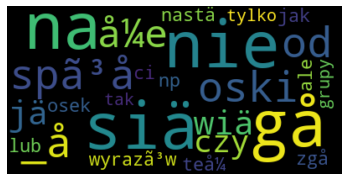

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


siä 110
na 82
nie 62
wiä 60
jest 45
szaman 42
byå 39
oto 39
jak 33
så 32
go 31
rzekå 31
å¼e 28
ci 27
mu 26
czå 25
oå 24
sä 24
anhelli 23
lecz 23
bo 22
mã³wiä 21
bä 21
co 20
ludzi 19


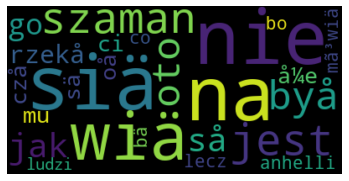

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


ja 226
hã 124
tã 93
mã 78
oli 74
ei 72
mutta 61
vã 60
nã 45
joka 42
myã 39
rooman 37
kã 37
niin 31
sen 30
se 29
kuin 29
nen 29
pã 28
sillã 28
skin 27
jã 27
ettã 26
ollut 24
jotka 23


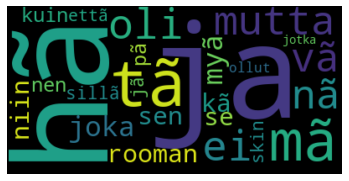

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


ja 211
se 117
oli 115
hã 98
niin 82
mutta 74
pã 57
kun 55
kã 54
ei 52
sanna 52
jo 45
vã 45
nã 45
nyt 40
kuin 38
arvi 37
mitã 35
lã 35
tã 35
ntã 33
siinã 30
ettã 29
vaan 28
llã 27


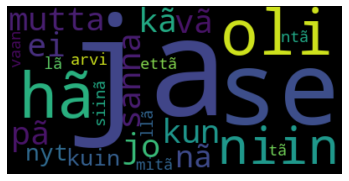

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


ja 295
hã 208
tã 98
kã 80
nen 75
oli 73
nã 61
vã 61
mã 54
nsã 49
pã 48
kuin 47
niin 44
mutta 40
se 40
ei 34
sen 30
sã 30
joka 29
lã 29
jã 29
ssã 25
ttã 25
silmã 22
sydã 22


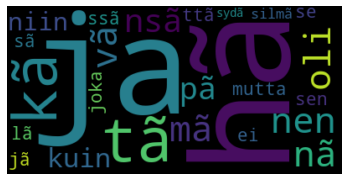

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


beam 30
one 28
walt 26
kingman 25
said 25
power 23
venus 22
channing 21
tube 20
don 20
got 20
driver 19
know 19
ve 18
terran 16
ll 16
solar 15
equilateral 15
think 15
stock 15
ship 15
right 14
use 13
will 13
time 13


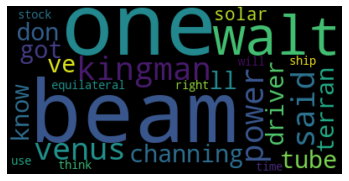

one 36
little 34
luc 27
man 20
work 19
two 18
day 16
whilst 16
great 15
beauclair 15
face 15
amidst 14
zola 13
labour 13
town 13
now 12
might 12
old 12
eyes 12
whose 12
four 12
away 11
went 11
abyss 11
works 11


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


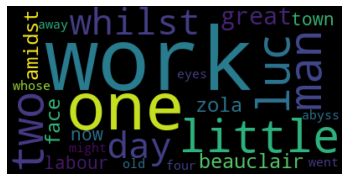

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


one 25
de 20
never 18
pontis 16
yet 16
anne 15
might 14
man 14
good 12
old 12
every 12
may 11
now 10
long 10
eyes 10
little 10
woman 10
heart 10
said 10
maiden 9
even 9
face 9
upon 9
us 9
marguerite 9


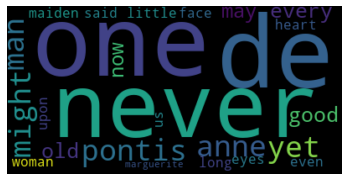

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


baby 85
mother 51
care 47
may 23
pregnancy 23
one 21
woman 19
expectant 19
women 18
doctor 17
little 16
life 15
first 15
early 15
well 13
mothers 13
ready 12
motherhood 12
every 12
doctors 12
good 12
will 11
advice 11
maternity 11
give 10


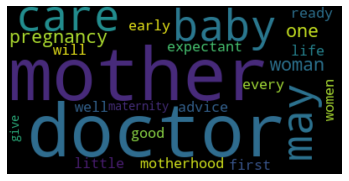

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


aladdin 103
tm 57
work 48
princess 45
sultan 43
said 38
magician 32
works 32
palace 30
lamp 29
electronic 27
will 26
mother 25
foundation 25
genie 24
terms 22
must 21
copyright 20
states 19
may 19
went 19
license 18
son 18
vizier 18
agreement 18


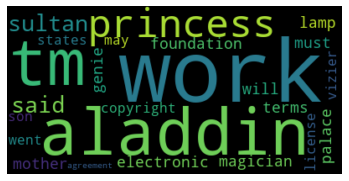

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


emerson 64
one 30
man 30
men 26
will 24
nature 23
life 22
great 22
mind 21
every 17
book 16
new 15
always 15
genius 15
english 14
us 14
essays 13
carlyle 13
soul 13
scholar 12
thought 12
first 12
must 12
american 11
books 11


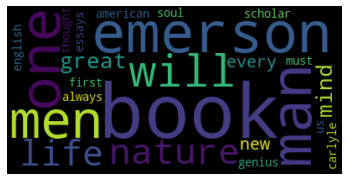

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


ll 34
said 32
kingman 31
channing 30
one 27
murdoch 26
re 19
may 16
man 16
will 15
three 15
asked 13
know 13
stuff 13
electric 13
wes 13
walt 13
use 12
terran 12
alloy 12
see 11
way 11
something 11
venus 11
good 11


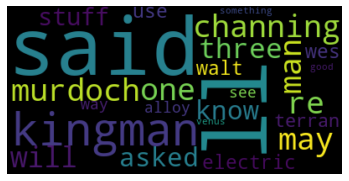

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


room 42
little 39
one 31
light 28
harriett 26
things 23
miriam 20
way 20
street 18
mrs 18
door 18
window 18
something 17
bright 16
life 16
said 15
back 15
people 15
road 14
now 14
felt 14
dark 14
bailey 13
coming 13
came 13


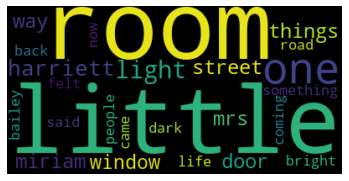

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


one 40
upon 30
brigands 26
us 20
old 18
two 16
illustration 15
side 15
three 14
great 14
made 13
time 12
lion 12
may 11
good 11
every 11
times 11
roar 11
behind 11
young 10
horses 10
hands 9
first 9
wild 9
lioness 9


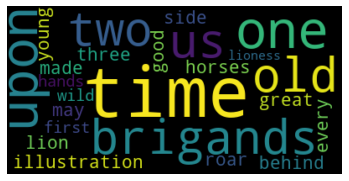

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


aniwee 74
chapter 34
queen 32
topsie 27
great 26
warrior 22
young 20
piñone 18
harry 17
inacayal 16
girl 16
cacique 15
warriors 15
indian 14
will 13
little 13
one 12
child 12
white 12
baby 11
indians 10
trauco 10
people 10
life 10
well 10


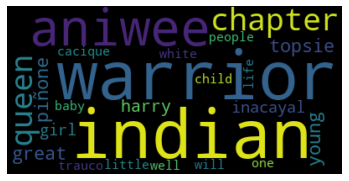

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


nie 126
na 93
å¼e 78
siä 68
gå 55
ci 40
od 37
jak 34
dla 34
ale 30
rzä 29
zboå¼a 27
juå¼ 26
wå 26
byå 25
kraju 25
tam 25
teå¼ 25
po 25
tak 22
aå 20
nam 20
za 20
tylko 20
ciä 19


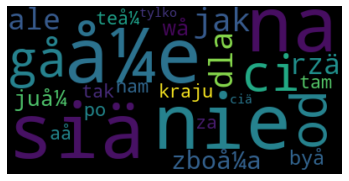

In [ ]:
for book in range(len(processed_bookWord)):
  common_words = get_top_n_words(processed_bookWord[book], 25)
  text = ''
  common_word_list = []
  for word, freq in common_words:
      text += " " + word
      common_word_list.append(word)
      print(word, freq)
  bookDict[bookName[book]] = common_word_list
  word_cloud(text)

In [ ]:
print(bookDict)

{'Greek': ['юпя', 'юбя', 'юн', 'юея', 'юкюбюй', 'юйя', 'юзя', 'юп', 'юб', 'юеюйя', 'юпюн', 'юзюн', 'юз', 'юўя', 'юдюе', 'юбюй', 'юќя', 'юџ', 'юе', 'юйюкя', 'юй', 'юкюбя', 'юќ', 'юня', 'юџя'], 'English': ['aniwee', 'chapter', 'queen', 'topsie', 'great', 'warrior', 'young', 'piñone', 'harry', 'inacayal', 'girl', 'cacique', 'warriors', 'indian', 'will', 'little', 'one', 'child', 'white', 'baby', 'indians', 'trauco', 'people', 'life', 'well'], 'Finnish': ['ja', 'hã', 'tã', 'kã', 'nen', 'oli', 'nã', 'vã', 'mã', 'nsã', 'pã', 'kuin', 'niin', 'mutta', 'se', 'ei', 'sen', 'sã', 'joka', 'lã', 'jã', 'ssã', 'ttã', 'silmã', 'sydã'], 'Polish': ['nie', 'na', 'å¼e', 'siä', 'gå', 'ci', 'od', 'jak', 'dla', 'ale', 'rzä', 'zboå¼a', 'juå¼', 'wå', 'byå', 'kraju', 'tam', 'teå¼', 'po', 'tak', 'aå', 'nam', 'za', 'tylko', 'ciä']}


In [ ]:
for book in range(len(bookChar)):
  common_words = get_top_n_chars(bookChar[book], 50)
  text = ''
  common_char_list = []
  for word, freq in common_words:
      text += " " + word
      common_char_list.append(word)
      print(word, freq)
  print("############################################################")

Ю 36672
Я 18740
Б 5466
П 4222
 4075
Й 3385
Н 3219
Е 2723
 2191
 2054
 1992
 1970
З 1954
К 1954
М 1906
e 1719
Ќ 1637
Л 1581
t 1424
o 1321
 1211
Џ 1199
r 1105
­ 1064
i 1026
n 1003
, 990
Г 948
a 942
 835
Д 772
. 731
 717
s 705
И 703
 663
 575
c 571
Ў 519
h 501
d 490
 484
u 469
l 423
' 414
В 392
 382
m 348
p 331
f 320
############################################################
Ю 320823
Я 172987
Б 49000
П 41986
 39864
Й 34462
Е 28948
Н 28040
 21379
 20854
К 19337
 17765
 17319
Ќ 16874
М 15692
Л 13902
З 11434
 10850
, 9904
­ 9847
Г 8776
Џ 8739
' 7812
 7043
Д 6690
 6358
 6286
 5964
И 5205
 4725
В 4426
. 4316
Ў 3989
О 2619
Т 2243
Ж 2110
e 1795
5 1761
 1548
t 1503
0 1485
 1473
 1406
o 1342
Є 1326
 1325
r 1156
i 1079
n 1026
a 1013
############################################################
Ю 49765
. 48885
e 45579
, 41888
t 36378
o 33898
a 32613
Я 31908
n 25354
с 24987
i 24836
r 24733
Н 21804
s 20176
1 16185
l 14509
c 13608
h 11881
d 11683
u 11630
f 11366
2 11164
П 10

In [ ]:
bookTestWord = []
bookTestNames = []
for filename in os.listdir("gdrive/My Drive/BookTest"):
    if filename.endswith("txt"):
      book = [line.replace("\n", "") for line in open("gdrive/My Drive/BookTest/"+filename)]
      bookTestNames.append(filname)
    bookTestWord.append(book)

In [ ]:
common_word_list_test = []
for book in bookTestWord:
  common_words = get_top_n_words(book, 50)
  text = ''
  for word, freq in common_words:
      text += " " + word
      common_word_list_test.append(word)
      print(word, freq)
  print("############################################################")

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


one 208
will 203
now 155
yet 152
man 137
father 133
upon 128
life 116
may 114
every 109
first 108
might 108
eyes 104
said 102
time 98
even 96
towards 94
saw 94
elizabeth 92
night 91
found 90
mind 85
day 82
heart 81
felt 80
death 79
work 78
feelings 76
must 74
thought 74
dear 72
soon 71
friend 71
many 70
made 70
never 69
still 68
passed 67
thus 66
place 65
miserable 65
heard 62
became 61
us 61
sometimes 60
love 59
clerval 59
country 58
little 58
human 58
############################################################
mr 784
elizabeth 634
darcy 417
will 415
said 402
mrs 344
much 327
bennet 324
must 315
bingley 307
jane 294
miss 283
one 273
know 237
though 226
well 224
never 218
sister 217
soon 215
think 211
may 206
now 203
time 203
might 201
good 200
every 198
wickham 194
lady 191
little 187
collins 180
without 178
nothing 177
lydia 171
make 168
say 160
dear 158
see 152
family 151
man 150
room 150
first 145
day 144
great 142
mother 137
father 135
two 131
young 130
give 127
made 126
catherin

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
trainData = []
for book in processed_bookWord:
  text = text_transform(book)
  text.sort_indices()
  trainData.append(text)

In [ ]:
trainData

[<828x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 5305 stored elements in Compressed Sparse Row format>,
 <828x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 7628 stored elements in Compressed Sparse Row format>,
 <828x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 4295 stored elements in Compressed Sparse Row format>,
 <828x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 8187 stored elements in Compressed Sparse Row format>,
 <828x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 4943 stored elements in Compressed Sparse Row format>,
 <828x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 3540 stored elements in Compressed Sparse Row format>,
 <828x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 4112 stored elements in Compressed Sparse Row format>,
 <828x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 4222 stored elements in Compressed Sparse Row format>,
 <828x1000 sparse matrix of type

In [ ]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(20, min_length, 1000)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation="softmax")
]
)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 20, 828, 32)       288032    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 414, 32)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 414, 64)       18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 207, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 66240)             0         
                                                                 
 dense_49 (Dense)            (None, 100)             

In [ ]:
dictionaryName = {
    "English": 1,
    "Finnish": 2,
    "Greek": 3,
    "Polish": 4
}

In [ ]:
Labels = [dictionaryName[i] for i in bookName]
Labels = np.array(Labels)
Labels

array([3, 3, 3, 3, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4])

In [ ]:
mnb = MultinomialNB()
mnb.fit(trainData, Labels)

In [ ]:
tensorboard = TensorBoard(log_dir="run")

history = model.fit(trainData, Labels,
                  epochs=10,
                  batch_size=10,
                  callbacks=[tensorboard],
                  shuffle=True)

In [ ]:
model.predict(bookTestWord)